## Group 2 - Incorporating Strength of Schedule into Model
## Seth Galluzzi (vzw6yk), Max Jones (maj3js), Said Mrad (sm2yk)

## Data Gathering

In [1]:
import os
import pandas as pd

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [2]:
## Appends each year's defensive dataframe into a list
DF_list = [pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/defense/' + str(i) + '.csv') 
           for i in range(1966, 2020)] 

In [3]:
DF_list2 = [pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/sos/' + str(i) + '.csv') 
           for i in range(2002, 2020)] 

In [4]:
year = 2002

## Creates new identifying "year" column for each year's dataframe
for i in range(0,18):
    DF_list2[i]['Year'] = year
    year += 1

In [5]:
year = 1966

## Creates new identifying "year" column for each year's dataframe
for i in range(0,54):
    DF_list[i]['Year'] = year
    year += 1

In [6]:
## Merges each year's dataframe into one dataframe
df_all = pd.concat(DF_list)
df5 = pd.concat(DF_list2)

In [7]:
## Removes unnecessary columns
df_all = df_all.drop(columns='Unnamed: 0')
df5 = df5.rename(columns={'Unnamed: 0': "Tm"})

In [8]:
## Write to github repo

#df_all.to_csv("df_all.csv")

## Create Variable For Prediction

In [9]:
df_all2 = df_all

In [10]:
df_all2 = df_all.sort_values(by=['Tm', 'Year'])

df_all2['Next_PPR_Allowed'] = 0

for i in range(0,1539):
    df_all2.iloc[i, df_all2.columns.get_loc('Next_PPR_Allowed')] = df_all2.iloc[i+1, df_all2.columns.get_loc('PPRFantasyPointsAllowed')]
    
df_all2['Next_PPRDefRank'] = 0

for i in range(0,1539):
    df_all2.iloc[i, df_all2.columns.get_loc('Next_PPRDefRank')] = df_all2.iloc[i+1, df_all2.columns.get_loc('PPRDefRank')]

## Only use data from 2000 onwards to avoid name changes and outdated trends

In [11]:
df_all3 = df_all2[df_all2['Year'] >= 2002]

In [12]:
df_all3 = df_all3[df_all3['Year']<2018]

In [13]:
## Write to github repo
#df_all3.to_csv("df_all3.csv")

#df_all3 = pd.read_csv('df_all3.csv')

In [14]:
df5 = df5[df5['Year']>=2002]


df6 = df5[df5['Year']==2018]


df5 = df5[df5['Year']<2018]

In [15]:
df5 = df5[["Tm", "PPRSOSRank", "RushingSOSRank", "PassingSOSRank", "Year"]]
df5 = df5.sort_values(by=['Tm', 'Year'])
df5.head(20)

df6 = df6[["Tm", "PPRSOSRank", "RushingSOSRank", "PassingSOSRank", "Year"]]
df6 = df6.sort_values(by=['Tm', 'Year'])
df6.head(20)

,Tm,PPRSOSRank,RushingSOSRank,PassingSOSRank,Year
13,Arizona Cardinals,19.0,11.0,24.0,2018
3,Atlanta Falcons,29.0,22.0,30.0,2018
1,Baltimore Ravens,31.0,31.0,29.0,2018
27,Buffalo Bills,5.0,4.0,7.0,2018
0,Carolina Panthers,32.0,14.0,31.0,2018
20,Chicago Bears,12.0,29.0,13.0,2018
8,Cincinnati Bengals,24.0,21.0,23.0,2018
2,Cleveland Browns,30.0,16.0,32.0,2018
11,Dallas Cowboys,21.0,6.0,21.0,2018
6,Denver Broncos,26.0,30.0,27.0,2018


In [16]:
df_all3.loc[df_all3['Next_PPR_Allowed'] == 0]
df_all3 = df_all3.drop(index=[26])

In [17]:
##########

In [18]:
df_all3.describe()

,PointsAllowed,TotalYardsAllowed,OffensivePlaysAllowed,YardsPerPlay,TO,ForcedFumbles,TotalFirstDownsAllowed,Cmp,PassingAttAllowed,PassingYardsAllowed,...,PPRFantasyPointsAllowed,PPRDefRank,HalfPPRFantasyPointsAllowed,HalfPPRDefRank,StandardFantasyPointsAllowed,StandardDefRank,Year,EXP,Next_PPR_Allowed,Next_PPRDefRank
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,...,496.000000,496.000000,496.000000,496.00000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,348.931452,5350.602823,1013.066532,5.280040,26.104839,10.683468,305.913306,328.667339,539.852823,3533.760081,...,1256.888508,16.203629,1092.554839,16.18750,928.221169,16.181452,2009.500000,74.525927,1268.520000,16.536290
std,57.305907,511.374703,44.026640,0.415343,6.447386,3.543469,28.569365,35.679610,44.937583,424.719426,...,142.607045,9.208739,131.642641,9.19657,122.308290,9.191747,4.614426,90.502697,145.876313,9.313328
min,196.000000,3795.000000,882.000000,3.900000,11.000000,2.000000,228.000000,239.000000,409.000000,2413.000000,...,835.000000,1.000000,705.500000,1.00000,576.000000,1.000000,2002.000000,-180.120000,845.060000,1.000000
25%,309.750000,5005.000000,980.750000,5.000000,22.000000,8.000000,286.000000,303.000000,511.000000,3230.500000,...,1159.990000,8.000000,1002.015000,8.00000,844.500000,8.000000,2005.750000,13.457500,1169.345000,8.000000
50%,346.000000,5355.500000,1010.000000,5.300000,26.000000,11.000000,307.000000,329.000000,538.000000,3532.000000,...,1255.430000,16.000000,1095.300000,16.00000,928.840000,16.000000,2009.500000,78.160000,1273.760000,17.000000
75%,388.000000,5697.500000,1041.250000,5.525000,30.000000,13.000000,325.000000,351.000000,569.000000,3814.000000,...,1353.405000,24.000000,1181.765000,24.00000,1012.375000,24.000000,2013.250000,132.567500,1368.215000,25.000000
max,517.000000,7042.000000,1150.000000,6.600000,48.000000,23.000000,388.000000,425.000000,670.000000,4796.000000,...,1693.260000,32.000000,1507.260000,32.00000,1321.260000,32.000000,2017.000000,339.230000,1693.260000,32.000000


In [19]:
df_all3 = df_all3.merge(df5, how='left', on=['Tm', 'Year'])
df_all2 = df_all2.merge(df6, how='left', on=['Tm', 'Year'])

In [20]:
feats = ["PointsAllowed", 
         "TotalYardsAllowed", 
         "OffensivePlaysAllowed", 
         "YardsPerPlay", 
         "TO",
         "ForcedFumbles",
         "TotalFirstDownsAllowed",
         "Cmp",
         "PassingAttAllowed",
         "PassingTDAllowed",
        "PPRFantasyPointsAllowed",
        "PPRSOSRank"
        ]

variables= ['Tm',
           'Year',
            "PPRFantasyPointsAllowed",
           "PPRDefRank",
            "PointsAllowed", 
            "TotalYardsAllowed", 
            "OffensivePlaysAllowed", 
            "YardsPerPlay", 
            "TO",
            "ForcedFumbles",
            "TotalFirstDownsAllowed",
            "Cmp",
            "PassingAttAllowed",
            "PassingTDAllowed",
           "Next_PPR_Allowed",
           "Next_PPRDefRank",
           "PPRSOSRank"]

In [21]:
###### Testing on 2019 Season

df19 = df_all2.loc[df_all2['Year']==2018]

spark_df = spark.createDataFrame(df19)

df19 = spark_df[variables]
############

In [22]:
spark_df = spark.createDataFrame(df_all3)

df = spark_df[variables]

In [23]:
df.sort('PPRDefRank','PPRFantasyPointsAllowed').show(10)

+--------------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+------------------+---------------+----------+
|                  Tm|Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|  TO|ForcedFumbles|TotalFirstDownsAllowed|  Cmp|PassingAttAllowed|PassingTDAllowed|  Next_PPR_Allowed|Next_PPRDefRank|PPRSOSRank|
+--------------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+------------------+---------------+----------+
|Tampa Bay Buccaneers|2002|                  835.0|       1.0|        196.0|           4044.0|                963.0|         4.2|38.0|          7.0|                 236.0|259.0|            510.0|            10.0|           

In [24]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

In [25]:
assembler = VectorAssembler(inputCols=feats,
                            outputCol="features")

tr = assembler.transform(df)
tr.select("*").show(1, truncate=False)

+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+----------+----------------------------------------------------------------------+
|Tm               |Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|TO  |ForcedFumbles|TotalFirstDownsAllowed|Cmp  |PassingAttAllowed|PassingTDAllowed|Next_PPR_Allowed|Next_PPRDefRank|PPRSOSRank|features                                                              |
+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+----------+----------------------------------------------------------------------+
|Arizona Cardinals|2002|1

In [26]:
# Initialize the `standardScaler`
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Fit the DataFrame to the scaler; this computes the mean, standard deviation of each feature
scalerModel = scaler.fit(tr)

# Transform the data in `df2` with the scaler
df2 = scalerModel.transform(tr)

In [27]:
df2.show(2)

+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+----------+--------------------+--------------------+
|               Tm|Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|  TO|ForcedFumbles|TotalFirstDownsAllowed|  Cmp|PassingAttAllowed|PassingTDAllowed|Next_PPR_Allowed|Next_PPRDefRank|PPRSOSRank|            features|      scaledFeatures|
+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+----------+--------------------+--------------------+
|Arizona Cardinals|2002|                1433.96|      28.0|        417.0|           6020.0|               1046.0

In [28]:
seed = 314
train_test = [0.8, 0.2]
train_data, test_data = df2.randomSplit(train_test, seed)

In [29]:
from pyspark.ml.regression import LinearRegression # note this is from the ML package

maxIter=10
regParam=0.3
elasticNetParam=0.8

lr = LinearRegression(featuresCol='scaledFeatures',         # feature vector name
                      labelCol='Next_PPR_Allowed',  # target variable name
                      maxIter=maxIter,
                      regParam=regParam, 
                      elasticNetParam=elasticNetParam)

In [30]:
lrModel = lr.fit(train_data)

In [31]:
lrPred = lrModel.transform(test_data)

## Evaluate

In [32]:
from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

Mean Squared Error: 14101.094097868896


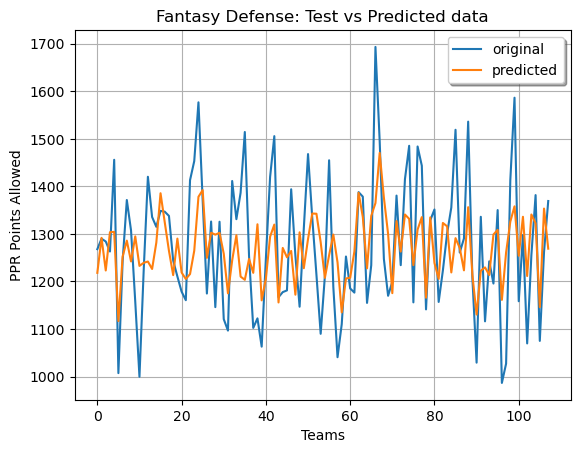

In [33]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred.count())
y_pred=lrPred.select("prediction").collect()
y_orig=lrPred.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+----------+----------------------------------------------------------------------+
|Tm               |Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|TO  |ForcedFumbles|TotalFirstDownsAllowed|Cmp  |PassingAttAllowed|PassingTDAllowed|Next_PPR_Allowed|Next_PPRDefRank|PPRSOSRank|features                                                              |
+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+----------+----------------------------------------------------------------------+
|Arizona Cardinals|2018|1

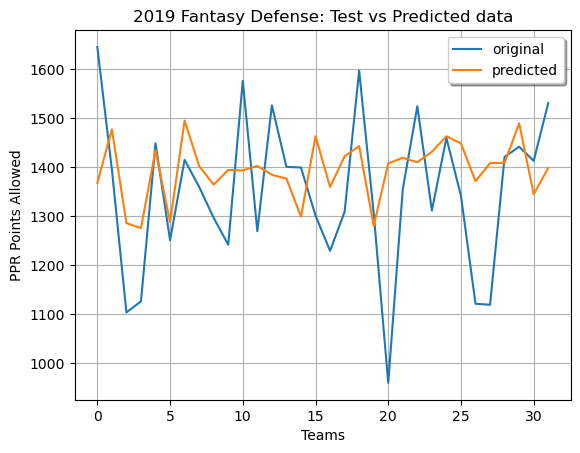

+--------------------+------------------+----------------+
|                  Tm|        prediction|Next_PPR_Allowed|
+--------------------+------------------+----------------+
|       Buffalo Bills|1275.2210733431982|         1126.12|
|   Minnesota Vikings|1279.8528372770431|         1305.98|
|    Baltimore Ravens|1285.5509526647156|          1103.5|
|       Chicago Bears|1287.1769559352906|         1250.76|
|Jacksonville Jaguars|1298.5903297819561|         1398.82|
|    Tennessee Titans|1344.2971857327227|          1412.4|
|Los Angeles Chargers| 1359.188788871745|         1229.06|
|      Dallas Cowboys|1363.9714844415741|         1296.24|
|   Arizona Cardinals|1367.3040281198296|          1644.6|
| Pittsburgh Steelers| 1370.857879606692|         1121.12|
|  Indianapolis Colts|1376.2601959314006|         1400.18|
|      Houston Texans|1383.9702596120383|         1525.34|
|       Detroit Lions| 1392.789969894919|         1575.64|
|      Denver Broncos| 1393.825051522378|         1241.5

In [34]:
assembler = VectorAssembler(inputCols=feats,
                            outputCol="features")

tr19 = assembler.transform(df19)
tr19.select("*").show(1, truncate=False)

# Initialize the `standardScaler`
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Fit the DataFrame to the scaler; this computes the mean, standard deviation of each feature
scalerModel19 = scaler.fit(tr19)

# Transform the data in `df2` with the scaler
df19 = scalerModel19.transform(tr19)

lrPred19 = lrModel.transform(df19)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPR_Allowed').show(32)

In [35]:
#### Second Model: Multinomial Logistic Regression with PPRDefRank

Mean Squared Error: 130.17592592592592


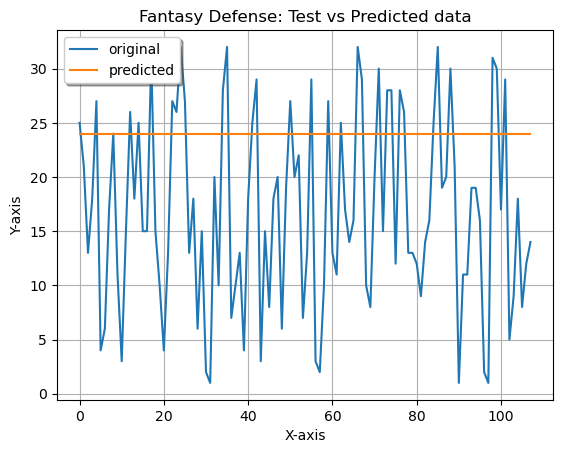

In [36]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol='scaledFeatures',         # feature vector name
                      labelCol='Next_PPRDefRank',  # target variable name
                      maxIter=maxIter,
                      regParam=regParam, 
                      elasticNetParam=elasticNetParam)

lrModel = lr.fit(train_data)

lrPred = lrModel.transform(test_data)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPRDefRank")
mse1 = ev.evaluate(lrPred, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

x_ax = range(0, lrPred.count())
y_pred=lrPred.select("prediction").collect()
y_orig=lrPred.select("Next_PPRDefRank").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Mean Squared Error: 1780794.2304375


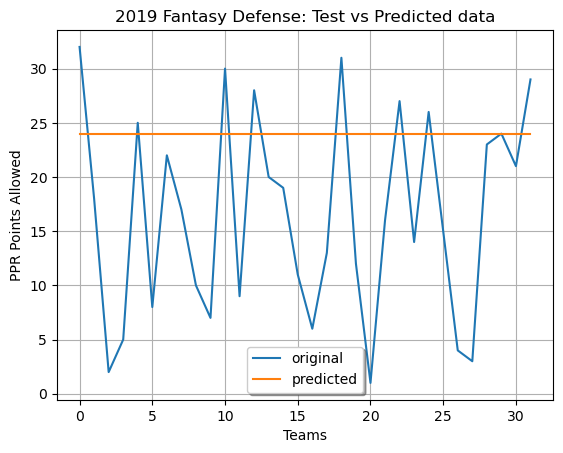

+--------------------+----------+---------------+
|                  Tm|prediction|Next_PPRDefRank|
+--------------------+----------+---------------+
|   Arizona Cardinals|      24.0|           32.0|
|     Atlanta Falcons|      24.0|           18.0|
|    Baltimore Ravens|      24.0|            2.0|
|       Buffalo Bills|      24.0|            5.0|
|   Carolina Panthers|      24.0|           25.0|
|       Chicago Bears|      24.0|            8.0|
|  Cincinnati Bengals|      24.0|           22.0|
|    Cleveland Browns|      24.0|           17.0|
|      Dallas Cowboys|      24.0|           10.0|
|      Denver Broncos|      24.0|            7.0|
|       Detroit Lions|      24.0|           30.0|
|   Green Bay Packers|      24.0|            9.0|
|      Houston Texans|      24.0|           28.0|
|  Indianapolis Colts|      24.0|           20.0|
|Jacksonville Jaguars|      24.0|           19.0|
|  Kansas City Chiefs|      24.0|           11.0|
|Los Angeles Chargers|      24.0|            6.0|


In [37]:
lrPred19 = lrModel.transform(df19)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPRDefRank").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPRDefRank').show(32)

In [38]:
###################### Linear Regression with Params and CrossVal - PPRFantasyPointsAllowed

In [39]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

CrossValidatorModel_f07d213c7222
MSE: 14215.254104549698


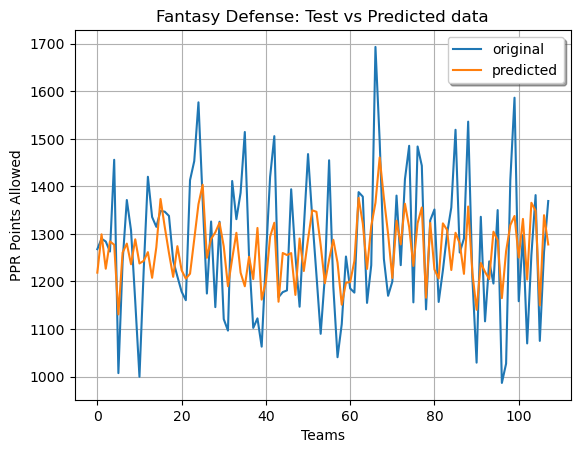

In [40]:
# Create initial LinearRegression model
lr = LinearRegression(labelCol="Next_PPR_Allowed", featuresCol="scaledFeatures")


# Create ParamGrid for Cross Validation
lrparamGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.001, 0.01, 0.1, 0.5, 1.0, 2.0])
             #  .addGrid(lr.regParam, [0.01, 0.1, 0.5])
             .addGrid(lr.elasticNetParam, [0.0, 0.25, 0.5, 0.75, 1.0])
             #  .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10, 20, 50])
             #  .addGrid(lr.maxIter, [1, 5, 10])
             .build())

# Evaluate model
lrevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed", metricName="mse")

# Create 5-fold CrossValidator
lrcv = CrossValidator(estimator = lr,
                    estimatorParamMaps = lrparamGrid,
                    evaluator = lrevaluator,
                    numFolds = 5)

# Run cross validations
lrcvModel = lrcv.fit(train_data)
print(lrcvModel)

# Get Model Summary Statistics
#lrcvSummary = lrcvModel.bestModel.summary
#print("Coefficient Standard Errors: " + str(lrcvSummary.coefficientStandardErrors))
#print("P Values: " + str(lrcvSummary.pValues)) # Last element is the intercept

# Use test set here so we can measure the accuracy of our model on new data
lrpredictions = lrcvModel.transform(test_data)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('MSE:', lrevaluator.evaluate(lrpredictions))


x_ax = range(0, lrpredictions.count())
y_pred=lrpredictions.select("prediction").collect()
y_orig=lrpredictions.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Mean Squared Error: 22262.25821132126


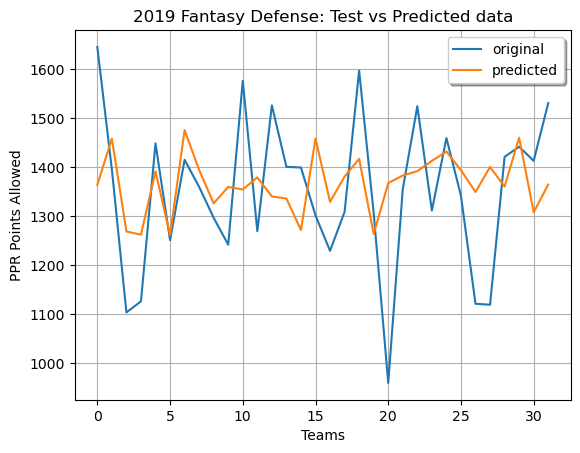

+--------------------+------------------+----------------+
|                  Tm|        prediction|Next_PPR_Allowed|
+--------------------+------------------+----------------+
|       Chicago Bears|1261.2081667696254|         1250.76|
|       Buffalo Bills|1262.0022173140655|         1126.12|
|   Minnesota Vikings| 1263.269268200691|         1305.98|
|    Baltimore Ravens|1268.5079116322067|          1103.5|
|Jacksonville Jaguars| 1271.327375420634|         1398.82|
|    Tennessee Titans|1307.6275540455658|          1412.4|
|      Dallas Cowboys|1325.7727136841515|         1296.24|
|Los Angeles Chargers|1328.7640382046457|         1229.06|
|  Indianapolis Colts|1335.6968561493763|         1400.18|
|      Houston Texans|1339.8108787072424|         1525.34|
| Pittsburgh Steelers|1348.9150595931826|         1121.12|
|       Detroit Lions|1354.0618057581146|         1575.64|
|      Denver Broncos| 1359.310630381043|         1241.56|
|    Seattle Seahawks|1360.1610859178252|         1420.5

In [41]:
lrPred19 = lrcvModel.transform(df19)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPR_Allowed').show(32)

In [42]:
####### Random Forest Classification PPRDefRank - String Format error? The graph is wrong because we still need next years rankings spot.

In [43]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

+-----------------+---------------+----------+
|               Tm|Next_PPRDefRank|prediction|
+-----------------+---------------+----------+
|Arizona Cardinals|           25.0|       8.0|
|Arizona Cardinals|           21.0|      30.0|
|Arizona Cardinals|           13.0|       7.0|
|  Atlanta Falcons|           18.0|      12.0|
|  Atlanta Falcons|           27.0|      25.0|
+-----------------+---------------+----------+
only showing top 5 rows



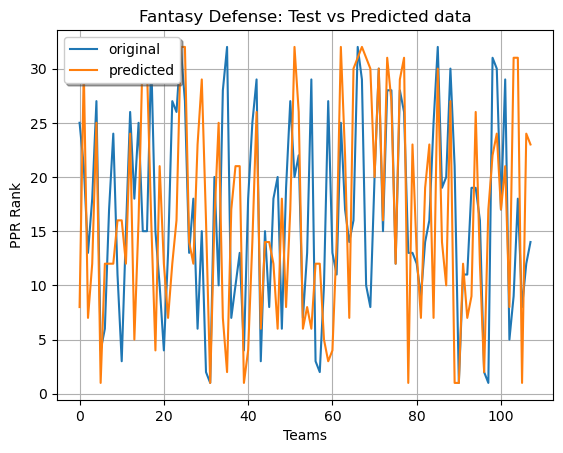

In [81]:

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="PPRDefRank", featuresCol="scaledFeatures", numTrees=10)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[rf])

# Train model.  This also runs the indexers.
model = pipeline.fit(train_data)

# Make predictions.
predictions = model.transform(test_data)

# Select example rows to display.
predictions.select('Tm', "Next_PPRDefRank", "prediction").show(5)

# Select (prediction, true label) and compute test error
#evaluator = MulticlassClassificationEvaluator(labelCol="Next_PPRDefRank", predictionCol="prediction", metricName="accuracy")
#acc = evaluator.evaluate(predictions)
#print("Test Error =" % acc)

x_ax = range(0, predictions.count())
y_pred=predictions.select("prediction").collect()
y_orig=predictions.select("Next_PPRDefRank").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Rank')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [82]:

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPRDefRank")
mse1 = ev.evaluate(predictions, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

Mean Squared Error: 108.60185185185185


Mean Squared Error: 192.53125000000003


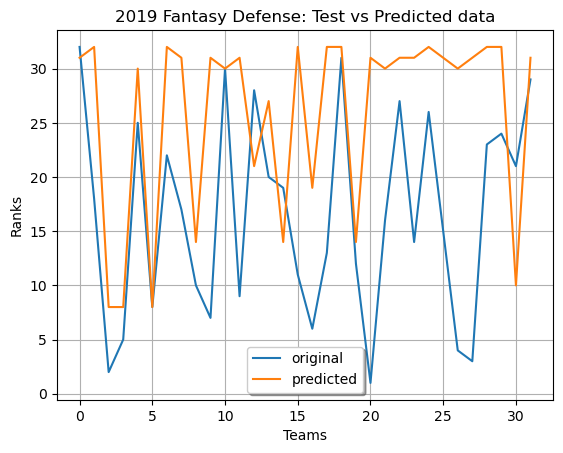

+--------------------+----------+---------------+
|                  Tm|prediction|Next_PPRDefRank|
+--------------------+----------+---------------+
|    Baltimore Ravens|       8.0|            2.0|
|       Chicago Bears|       8.0|            8.0|
|       Buffalo Bills|       8.0|            5.0|
|    Tennessee Titans|      10.0|           21.0|
|      Dallas Cowboys|      14.0|           10.0|
|Jacksonville Jaguars|      14.0|           19.0|
|   Minnesota Vikings|      14.0|           12.0|
|Los Angeles Chargers|      19.0|            6.0|
|      Houston Texans|      21.0|           28.0|
|  Indianapolis Colts|      27.0|           20.0|
|   Carolina Panthers|      30.0|           25.0|
|  New Orleans Saints|      30.0|           16.0|
|       Detroit Lions|      30.0|           30.0|
| Pittsburgh Steelers|      30.0|            4.0|
|    Cleveland Browns|      31.0|           17.0|
|     New York Giants|      31.0|           27.0|
|      Denver Broncos|      31.0|            7.0|


In [83]:
lrPred19 = model.transform(df19)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPRDefRank")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPRDefRank").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('Ranks')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPRDefRank').show(32)

In [84]:
###### GBT Regression Model/Param Tuning and CrossVal - PPRFantasyPointsAllowed

In [85]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

+--------------------+----+----------------+------------------+
|                  Tm|Year|Next_PPR_Allowed|        prediction|
+--------------------+----+----------------+------------------+
|    Tennessee Titans|2002|         1158.34| 1076.573160737771|
|  Indianapolis Colts|2002|         1102.26|1132.5683908720077|
|      St. Louis Rams|2002|         1116.08|1356.7073699592236|
|New England Patriots|2003|          1110.2|1179.0827260004546|
| San Francisco 49ers|2003|         1355.54|1209.7272511742572|
|    Cleveland Browns|2003|         1160.54| 1224.256144961026|
|   Green Bay Packers|2003|         1386.62|1257.9552547898197|
|    Baltimore Ravens|2003|         1007.18| 1275.697719721945|
| Philadelphia Eagles|2003|         1155.98| 1289.556216658956|
|      St. Louis Rams|2003|         1242.26|1405.3629738566488|
+--------------------+----+----------------+------------------+
only showing top 10 rows

MSE = 20447.3


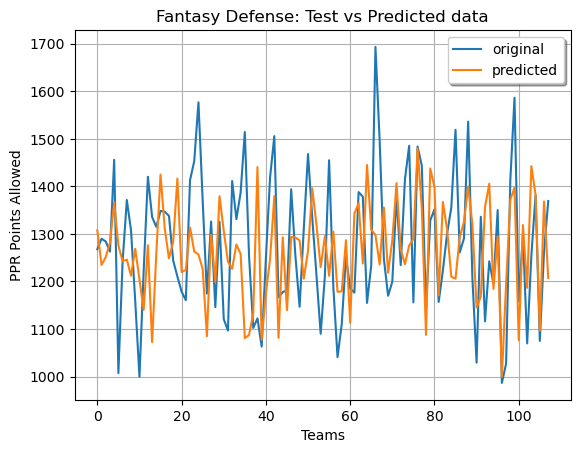

In [86]:
# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.

# Train a GBT model.
gbt = GBTRegressor(labelCol="Next_PPR_Allowed", featuresCol="scaledFeatures", maxIter=10)

# Chain indexer and GBT in a Pipeline
pipeline = Pipeline(stages=[gbt])

# Train model.  This also runs the indexer.
model = pipeline.fit(train_data)

# Make predictions.
predictions = model.transform(test_data)

# Select example rows to display.
predictions.select("Tm", "Year","Next_PPR_Allowed","prediction").sort('Year','prediction').show(10)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="Next_PPR_Allowed", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)
print("MSE = %g" % mse)



x_ax = range(0, predictions.count())
y_pred=predictions.select("prediction").collect()
y_orig=predictions.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Mean Squared Error: 35144.81672952082


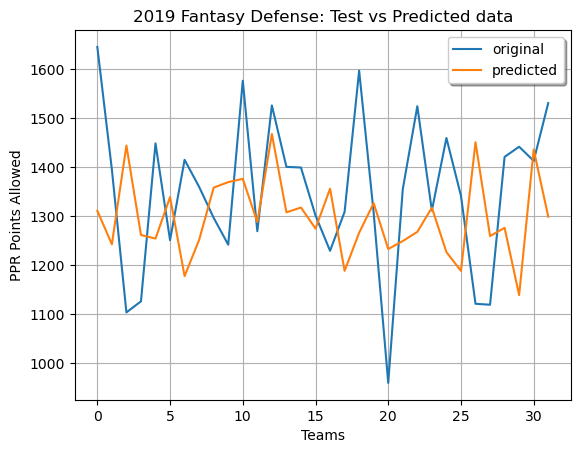

+--------------------+------------------+----------------+
|                  Tm|        prediction|Next_PPR_Allowed|
+--------------------+------------------+----------------+
|Tampa Bay Buccaneers|1138.8112391322522|         1441.18|
|  Cincinnati Bengals|1177.5087052316087|         1414.58|
| Philadelphia Eagles|1188.1395615128042|          1341.3|
|    Los Angeles Rams|1188.2711997592958|          1308.4|
|     Oakland Raiders|1226.5068144670822|         1458.98|
|New England Patriots| 1232.770051997902|          959.84|
|     Atlanta Falcons|1242.3827569930104|         1395.02|
|  New Orleans Saints|1249.0073068771878|         1354.62|
|    Cleveland Browns|1251.3204337388015|          1359.3|
|   Carolina Panthers| 1253.993637453173|         1448.04|
| San Francisco 49ers|1259.1238653225023|         1119.18|
|       Buffalo Bills|1261.2840723864124|         1126.12|
|      Miami Dolphins|1265.9643083221995|         1596.32|
|     New York Giants|1267.6924392014141|          1523.

In [87]:
lrPred19 = model.transform(df19)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPR_Allowed').show(32)

In [88]:
###### Random Forest Regression - PPRFantasyPointsAllowed

In [89]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

+-----------------+----------------+------------------+--------------------+
|               Tm|Next_PPR_Allowed|        prediction|      scaledFeatures|
+-----------------+----------------+------------------+--------------------+
|Arizona Cardinals|         1267.86|1198.8092807267526|[6.753230485155,9...|
|Arizona Cardinals|         1289.86|1286.3859877995405|[7.43378859606209...|
|Arizona Cardinals|         1284.02|1229.9981656702232|[6.22972424599569...|
|  Atlanta Falcons|          1262.9|1302.5547192748738|[5.67131759089244...|
|  Atlanta Falcons|         1455.88| 1308.047646980653|[5.21761218362104...|
+-----------------+----------------+------------------+--------------------+
only showing top 5 rows

MSE = 15011


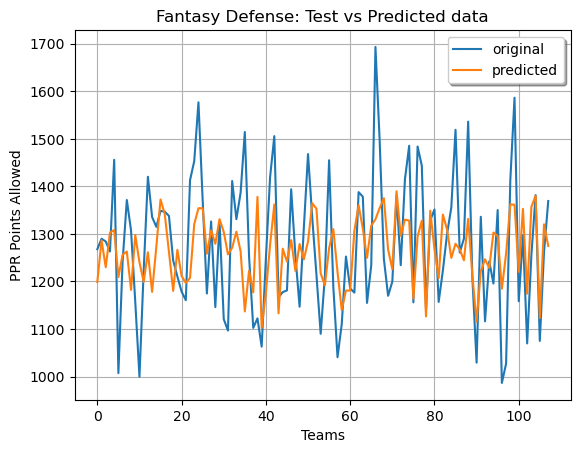

In [90]:
# Train a RandomForest model.
rf = RandomForestRegressor(labelCol="Next_PPR_Allowed", featuresCol="scaledFeatures")

# Chain indexer and forest in a Pipeline
pipeline = Pipeline(stages=[rf])

# Train model.  This also runs the indexer.
model = pipeline.fit(train_data)

# Make predictions.
predictions = model.transform(test_data)

# Select example rows to display.
predictions.select("Tm", "Next_PPR_Allowed","prediction", "scaledFeatures").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="Next_PPR_Allowed", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)
print("MSE = %g" % mse)


x_ax = range(0, predictions.count())
y_pred=predictions.select("prediction").collect()
y_orig=predictions.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Mean Squared Error: 22823.82571184011


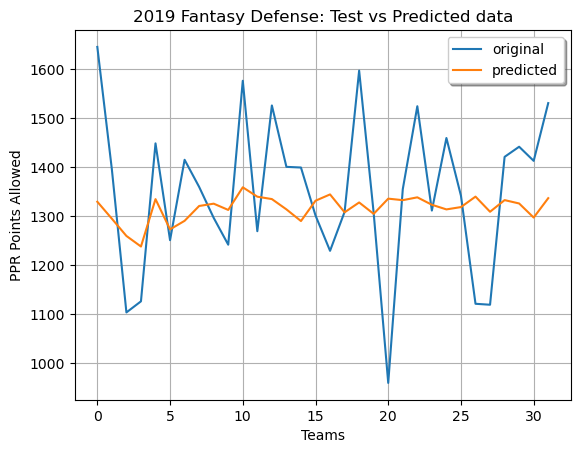

+--------------------+------------------+----------------+
|                  Tm|        prediction|Next_PPR_Allowed|
+--------------------+------------------+----------------+
|       Buffalo Bills| 1237.841222749605|         1126.12|
|    Baltimore Ravens|  1259.37448434356|          1103.5|
|       Chicago Bears|1272.7690670990692|         1250.76|
|Jacksonville Jaguars| 1289.740987418437|         1398.82|
|  Cincinnati Bengals|1290.1853333840158|         1414.58|
|     Atlanta Falcons|1294.5312861489929|         1395.02|
|    Tennessee Titans| 1296.830961049032|          1412.4|
|   Minnesota Vikings|1304.3881506311377|         1305.98|
|    Los Angeles Rams|1307.5437792884416|          1308.4|
| San Francisco 49ers|1308.6580450414606|         1119.18|
|      Denver Broncos|1312.4002151344594|         1241.56|
|     Oakland Raiders|1313.4722490388926|         1458.98|
|  Indianapolis Colts|1313.5414653524454|         1400.18|
| Philadelphia Eagles|1318.2038186737343|          1341.

In [91]:
lrPred19 = model.transform(df19)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPR_Allowed').show(32)

In [92]:
### Random Forest Regressor with paramgrid and crossval - PPRFantasyPointsAllowed

CrossValidatorModel_fa202f7bd8aa
MSE: 15011.015651681253


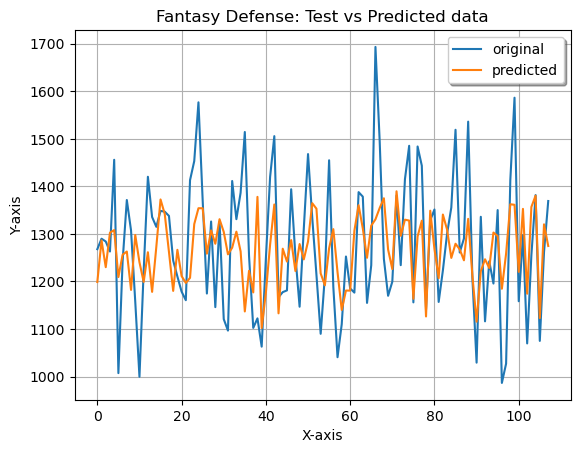

In [93]:
# Create initial LinearRegression model
rf = RandomForestRegressor(labelCol="Next_PPR_Allowed", featuresCol="scaledFeatures")


# Create ParamGrid for Cross Validation
lrparamGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.001, 0.01, 0.1, 0.5, 1.0, 2.0])
             #  .addGrid(lr.regParam, [0.01, 0.1, 0.5])
             .addGrid(lr.elasticNetParam, [0.0, 0.25, 0.5, 0.75, 1.0])
             #  .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10, 20, 50])
             #  .addGrid(lr.maxIter, [1, 5, 10])
             .build())

# Evaluate model
lrevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed", metricName="mse")

# Create 5-fold CrossValidator
lrcv = CrossValidator(estimator = rf,
                    estimatorParamMaps = lrparamGrid,
                    evaluator = lrevaluator,
                    numFolds = 5)

# Run cross validations
lrcvModel = lrcv.fit(train_data)
print(lrcvModel)



# Use test set here so we can measure the accuracy of our model on new data
lrpredictions = lrcvModel.transform(test_data)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('MSE:', lrevaluator.evaluate(lrpredictions))


x_ax = range(0, lrpredictions.count())
y_pred=lrpredictions.select("prediction").collect()
y_orig=lrpredictions.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Mean Squared Error: 22823.82571184011


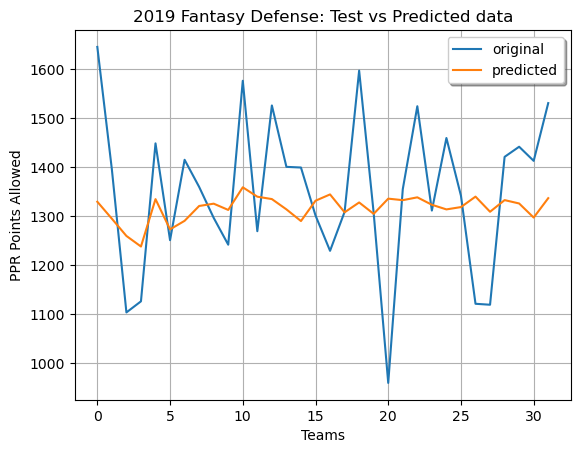

+--------------------+------------------+----------------+
|                  Tm|        prediction|Next_PPR_Allowed|
+--------------------+------------------+----------------+
|       Buffalo Bills| 1237.841222749605|         1126.12|
|    Baltimore Ravens|  1259.37448434356|          1103.5|
|       Chicago Bears|1272.7690670990692|         1250.76|
|Jacksonville Jaguars| 1289.740987418437|         1398.82|
|  Cincinnati Bengals|1290.1853333840158|         1414.58|
|     Atlanta Falcons|1294.5312861489929|         1395.02|
|    Tennessee Titans| 1296.830961049032|          1412.4|
|   Minnesota Vikings|1304.3881506311377|         1305.98|
|    Los Angeles Rams|1307.5437792884416|          1308.4|
| San Francisco 49ers|1308.6580450414606|         1119.18|
|      Denver Broncos|1312.4002151344594|         1241.56|
|     Oakland Raiders|1313.4722490388926|         1458.98|
|  Indianapolis Colts|1313.5414653524454|         1400.18|
| Philadelphia Eagles|1318.2038186737343|          1341.

In [94]:
lrPred19 = lrcvModel.transform(df19)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPR_Allowed').show(32)

In [58]:
##### GBOOST Regression

MSE:  20447.266770400453


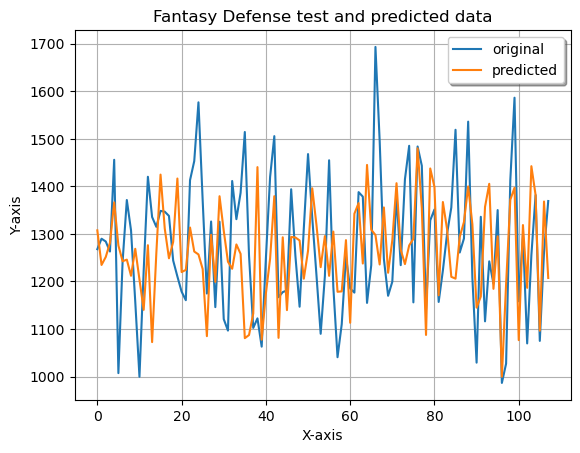

In [59]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.regression import GBTRegressor
import matplotlib.pyplot as plt


gbtr = GBTRegressor(featuresCol='scaledFeatures', labelCol='Next_PPR_Allowed', maxIter=10)
gbtr = gbtr.fit(train_data)

mdata = gbtr.transform(test_data)


mse=RegressionEvaluator(labelCol="Next_PPR_Allowed", predictionCol="prediction", metricName="mse")
mse=mse.evaluate(mdata)

print("MSE: ", mse)


x_ax = range(0, mdata.count())
y_pred=mdata.select("prediction").collect()
y_orig=mdata.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Mean Squared Error: 35144.81672952082


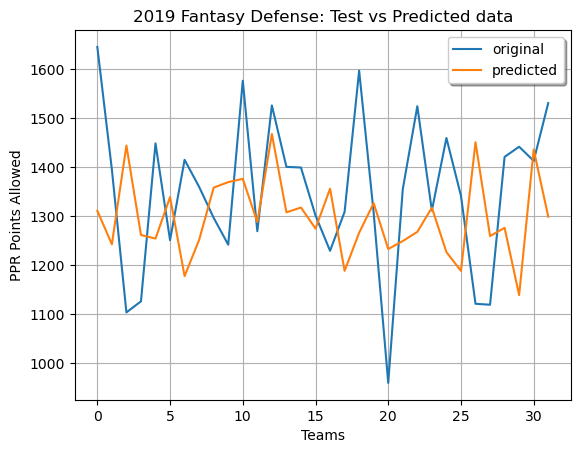

+--------------------+------------------+----------------+
|                  Tm|        prediction|Next_PPR_Allowed|
+--------------------+------------------+----------------+
|Tampa Bay Buccaneers|1138.8112391322522|         1441.18|
|  Cincinnati Bengals|1177.5087052316087|         1414.58|
| Philadelphia Eagles|1188.1395615128042|          1341.3|
|    Los Angeles Rams|1188.2711997592958|          1308.4|
|     Oakland Raiders|1226.5068144670822|         1458.98|
|New England Patriots| 1232.770051997902|          959.84|
|     Atlanta Falcons|1242.3827569930104|         1395.02|
|  New Orleans Saints|1249.0073068771878|         1354.62|
|    Cleveland Browns|1251.3204337388015|          1359.3|
|   Carolina Panthers| 1253.993637453173|         1448.04|
| San Francisco 49ers|1259.1238653225023|         1119.18|
|       Buffalo Bills|1261.2840723864124|         1126.12|
|      Miami Dolphins|1265.9643083221995|         1596.32|
|     New York Giants|1267.6924392014141|          1523.

In [60]:
lrPred19 = gbtr.transform(df19)

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPR_Allowed').show(32)

In [61]:
#################### Hybrid Model: Multinomial Logistic Regression with PPRDefRank Splits

In [62]:
df2.show(2)

+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+----------+--------------------+--------------------+
|               Tm|Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|  TO|ForcedFumbles|TotalFirstDownsAllowed|  Cmp|PassingAttAllowed|PassingTDAllowed|Next_PPR_Allowed|Next_PPRDefRank|PPRSOSRank|            features|      scaledFeatures|
+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+----------+--------------------+--------------------+
|Arizona Cardinals|2002|                1433.96|      28.0|        417.0|           6020.0|               1046.0

In [63]:
dfsplit = df2

In [64]:
from pyspark.sql import functions as F

In [65]:
dfsplit = dfsplit.withColumn(
    "PPRDefRankSplits", 
     F.col("PPRDefRank"))

In [66]:
dfsplit.show(2)

+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+----------+--------------------+--------------------+----------------+
|               Tm|Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|  TO|ForcedFumbles|TotalFirstDownsAllowed|  Cmp|PassingAttAllowed|PassingTDAllowed|Next_PPR_Allowed|Next_PPRDefRank|PPRSOSRank|            features|      scaledFeatures|PPRDefRankSplits|
+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+----------+--------------------+--------------------+----------------+
|Arizona Cardinals|2002|                1433.96|      28.0|  

In [67]:
from pyspark.sql.functions import when

In [68]:
dfsplit = dfsplit.withColumn("PPRDefRankSplits", when(dfsplit.PPRDefRankSplits == '2','1') \
      .when(dfsplit.PPRDefRankSplits == '3','1') \
      .when(dfsplit.PPRDefRankSplits == '4','1') \
      .when(dfsplit.PPRDefRankSplits == '1','1') \
      .when(dfsplit.PPRDefRankSplits == '5','1') \
      .when(dfsplit.PPRDefRankSplits == '6','1') \
      .when(dfsplit.PPRDefRankSplits == '7','1') \
      .when(dfsplit.PPRDefRankSplits == '8','1') \
      .when(dfsplit.PPRDefRankSplits == '9','2') \
      .when(dfsplit.PPRDefRankSplits == '10','2') \
      .when(dfsplit.PPRDefRankSplits == '11','2') \
      .when(dfsplit.PPRDefRankSplits == '12','2') \
      .when(dfsplit.PPRDefRankSplits == '13','2') \
      .when(dfsplit.PPRDefRankSplits == '14','2') \
      .when(dfsplit.PPRDefRankSplits == '15','2') \
      .when(dfsplit.PPRDefRankSplits == '16','2') \
      .when(dfsplit.PPRDefRankSplits == '17','3') \
      .when(dfsplit.PPRDefRankSplits == '18','3') \
      .when(dfsplit.PPRDefRankSplits == '19','3') \
      .when(dfsplit.PPRDefRankSplits == '20','3') \
      .when(dfsplit.PPRDefRankSplits == '21','3') \
      .when(dfsplit.PPRDefRankSplits == '22','3') \
      .when(dfsplit.PPRDefRankSplits == '23','3') \
      .when(dfsplit.PPRDefRankSplits == '24','3') \
      .when(dfsplit.PPRDefRankSplits == '25','4') \
      .when(dfsplit.PPRDefRankSplits == '26','4') \
      .when(dfsplit.PPRDefRankSplits == '27','4') \
      .when(dfsplit.PPRDefRankSplits == '28','4') \
      .when(dfsplit.PPRDefRankSplits == '29','4') \
      .when(dfsplit.PPRDefRankSplits == '30','4') \
      .when(dfsplit.PPRDefRankSplits == '31','4') \
      .when(dfsplit.PPRDefRankSplits == '32','4'))

In [69]:
dfsplit.show(2)

+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+----------+--------------------+--------------------+----------------+
|               Tm|Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|  TO|ForcedFumbles|TotalFirstDownsAllowed|  Cmp|PassingAttAllowed|PassingTDAllowed|Next_PPR_Allowed|Next_PPRDefRank|PPRSOSRank|            features|      scaledFeatures|PPRDefRankSplits|
+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+----------+--------------------+--------------------+----------------+
|Arizona Cardinals|2002|                1433.96|      28.0|  

In [70]:
from pyspark.sql.types import IntegerType
dfsplit = dfsplit.withColumn("PPRDefRankSplits", dfsplit["PPRDefRankSplits"].cast(IntegerType()))

In [71]:
dfsplit19 = df19.withColumn(
    "PPRDefRankSplits", 
     F.col("PPRDefRank"))

In [72]:
dfsplit19 = dfsplit19.withColumn("PPRDefRankSplits", when(dfsplit19.PPRDefRankSplits == '2','1') \
      .when(dfsplit19.PPRDefRankSplits == '3','1') \
      .when(dfsplit19.PPRDefRankSplits == '4','1') \
      .when(dfsplit19.PPRDefRankSplits == '1','1') \
      .when(dfsplit19.PPRDefRankSplits == '5','1') \
      .when(dfsplit19.PPRDefRankSplits == '6','1') \
      .when(dfsplit19.PPRDefRankSplits == '7','1') \
      .when(dfsplit19.PPRDefRankSplits == '8','1') \
      .when(dfsplit19.PPRDefRankSplits == '9','2') \
      .when(dfsplit19.PPRDefRankSplits == '10','2') \
      .when(dfsplit19.PPRDefRankSplits == '11','2') \
      .when(dfsplit19.PPRDefRankSplits == '12','2') \
      .when(dfsplit19.PPRDefRankSplits == '13','2') \
      .when(dfsplit19.PPRDefRankSplits == '14','2') \
      .when(dfsplit19.PPRDefRankSplits == '15','2') \
      .when(dfsplit19.PPRDefRankSplits == '16','2') \
      .when(dfsplit19.PPRDefRankSplits == '17','3') \
      .when(dfsplit19.PPRDefRankSplits == '18','3') \
      .when(dfsplit19.PPRDefRankSplits == '19','3') \
      .when(dfsplit19.PPRDefRankSplits == '20','3') \
      .when(dfsplit19.PPRDefRankSplits == '21','3') \
      .when(dfsplit19.PPRDefRankSplits == '22','3') \
      .when(dfsplit19.PPRDefRankSplits == '23','3') \
      .when(dfsplit19.PPRDefRankSplits == '24','3') \
      .when(dfsplit19.PPRDefRankSplits == '25','4') \
      .when(dfsplit19.PPRDefRankSplits == '26','4') \
      .when(dfsplit19.PPRDefRankSplits == '27','4') \
      .when(dfsplit19.PPRDefRankSplits == '28','4') \
      .when(dfsplit19.PPRDefRankSplits == '29','4') \
      .when(dfsplit19.PPRDefRankSplits == '30','4') \
      .when(dfsplit19.PPRDefRankSplits == '31','4') \
      .when(dfsplit19.PPRDefRankSplits == '32','4'))

In [73]:
dfsplit19 = dfsplit19.withColumn("PPRDefRankSplits", dfsplit19["PPRDefRankSplits"].cast(IntegerType()))

In [74]:
seed = 314
train_test = [0.8, 0.2]
train2_data, test2_data = dfsplit.randomSplit(train_test, seed)

In [75]:
lr = LogisticRegression(featuresCol='scaledFeatures',         # feature vector name
                      labelCol='PPRDefRankSplits',  # target variable name
                      maxIter=maxIter,
                      regParam=regParam, 
                      elasticNetParam=elasticNetParam)

Mean Squared Error: 1.5277777777777777


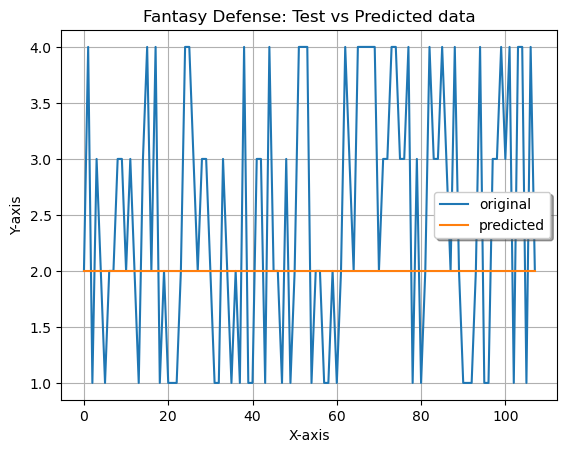

In [76]:
lrModel = lr.fit(train2_data)

lrPred = lrModel.transform(test2_data)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="PPRDefRankSplits")
mse1 = ev.evaluate(lrPred, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)


x_ax = range(0, lrPred.count())
y_pred=lrPred.select("prediction").collect()
y_orig=lrPred.select("PPRDefRankSplits").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Mean Squared Error: 1.4999999999999998


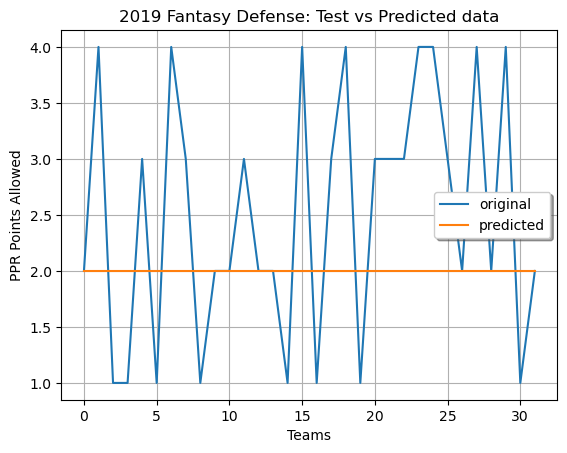

+--------------------+----------+----------------+
|                  Tm|prediction|PPRDefRankSplits|
+--------------------+----------+----------------+
|   Arizona Cardinals|       2.0|               2|
|     Atlanta Falcons|       2.0|               4|
|    Baltimore Ravens|       2.0|               1|
|       Buffalo Bills|       2.0|               1|
|   Carolina Panthers|       2.0|               3|
|       Chicago Bears|       2.0|               1|
|  Cincinnati Bengals|       2.0|               4|
|    Cleveland Browns|       2.0|               3|
|      Dallas Cowboys|       2.0|               1|
|      Denver Broncos|       2.0|               2|
|       Detroit Lions|       2.0|               2|
|   Green Bay Packers|       2.0|               3|
|      Houston Texans|       2.0|               2|
|  Indianapolis Colts|       2.0|               2|
|Jacksonville Jaguars|       2.0|               1|
|  Kansas City Chiefs|       2.0|               4|
|Los Angeles Chargers|       2.

In [77]:
lrPred19 = lrModel.transform(dfsplit19)

ev = RegressionEvaluator(predictionCol="prediction", labelCol="PPRDefRankSplits")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("PPRDefRankSplits").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction',"PPRDefRankSplits").show(32)

+-----------------+----------------+----------+
|               Tm|PPRDefRankSplits|prediction|
+-----------------+----------------+----------+
|Arizona Cardinals|               2|       2.0|
|Arizona Cardinals|               4|       4.0|
|Arizona Cardinals|               1|       2.0|
|  Atlanta Falcons|               3|       2.0|
|  Atlanta Falcons|               2|       2.0|
+-----------------+----------------+----------+
only showing top 5 rows



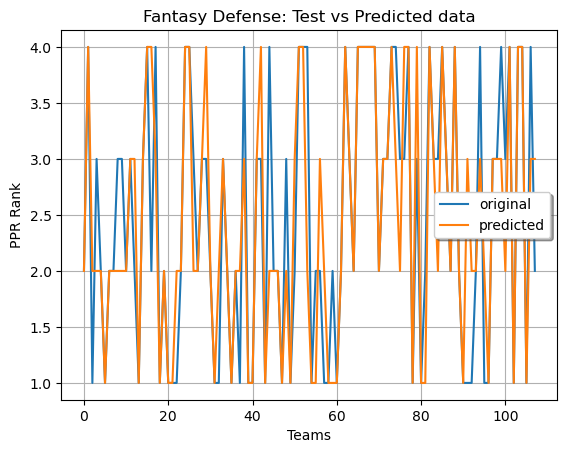

In [78]:

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="PPRDefRankSplits", featuresCol="scaledFeatures", numTrees=10)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[rf])

# Train model.  This also runs the indexers.
model = pipeline.fit(train2_data)

# Make predictions.
predictions = model.transform(test2_data)

# Select example rows to display.
predictions.select('Tm', "PPRDefRankSplits", "prediction").show(5)

# Select (prediction, true label) and compute test error
#evaluator = MulticlassClassificationEvaluator(labelCol="Next_PPRDefRank", predictionCol="prediction", metricName="accuracy")
#acc = evaluator.evaluate(predictions)
#print("Test Error =" % acc)

x_ax = range(0, predictions.count())
y_pred=predictions.select("prediction").collect()
y_orig=predictions.select("PPRDefRankSplits").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Rank')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Mean Squared Error: 1.3125


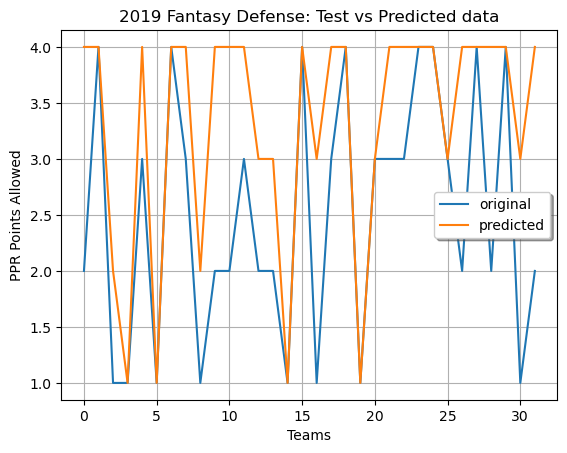

+--------------------+----------+----------------+
|                  Tm|prediction|PPRDefRankSplits|
+--------------------+----------+----------------+
|       Buffalo Bills|       1.0|               1|
|       Chicago Bears|       1.0|               1|
|Jacksonville Jaguars|       1.0|               1|
|   Minnesota Vikings|       1.0|               1|
|    Baltimore Ravens|       2.0|               1|
|      Dallas Cowboys|       2.0|               1|
|  Indianapolis Colts|       3.0|               2|
|Los Angeles Chargers|       3.0|               1|
|New England Patriots|       3.0|               3|
| Philadelphia Eagles|       3.0|               3|
|    Tennessee Titans|       3.0|               1|
|      Houston Texans|       3.0|               2|
|   Arizona Cardinals|       4.0|               2|
|  Cincinnati Bengals|       4.0|               4|
|     Atlanta Falcons|       4.0|               4|
|    Cleveland Browns|       4.0|               3|
|   Green Bay Packers|       4.

In [79]:
lrPred19 = model.transform(dfsplit19)

ev = RegressionEvaluator(predictionCol="prediction", labelCol="PPRDefRankSplits")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("PPRDefRankSplits").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction',"PPRDefRankSplits").show(32)